In [5]:
import pandas as pd
import numpy as np

data = pd.read_excel('heart_disease.xlsx', sheet_name= 'Heart_disease')
data


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [9]:
##Exploratory data analysis
missing_values = data.isnull().sum()
missing_values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [19]:
ddf = data.dropna()

In [21]:
missing_values = ddf.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    int64  
 1   sex       846 non-null    object 
 2   cp        846 non-null    object 
 3   trestbps  846 non-null    int64  
 4   chol      846 non-null    int64  
 5   fbs       846 non-null    bool   
 6   restecg   846 non-null    object 
 7   thalch    846 non-null    int64  
 8   exang     846 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     846 non-null    object 
 11  thal      846 non-null    object 
 12  num       846 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.7+ KB
None


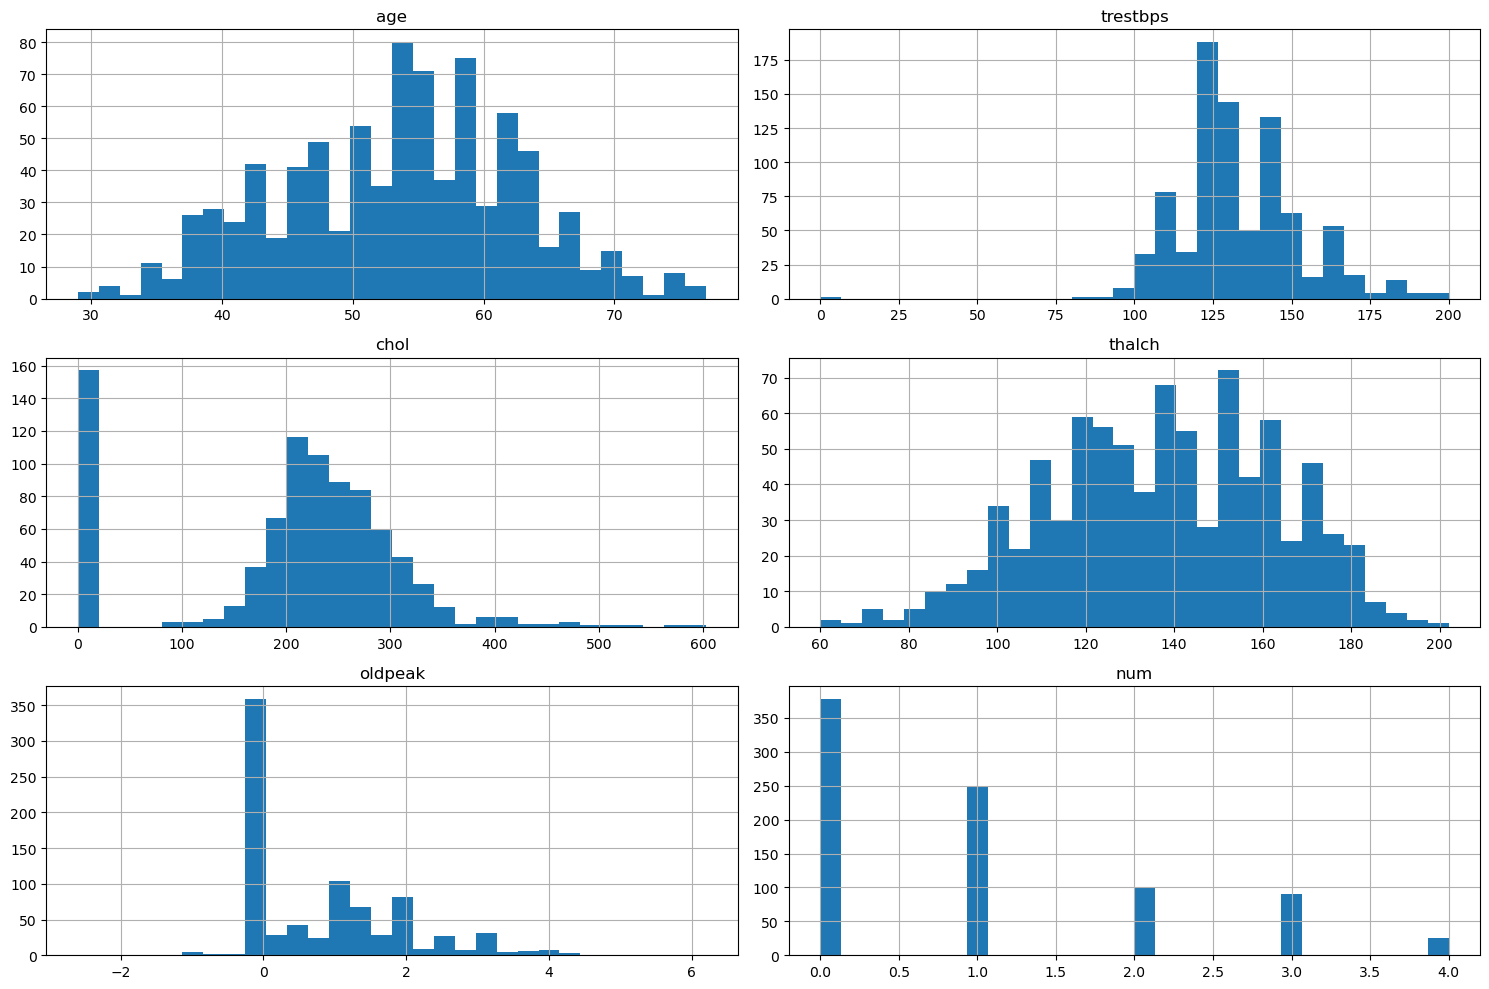

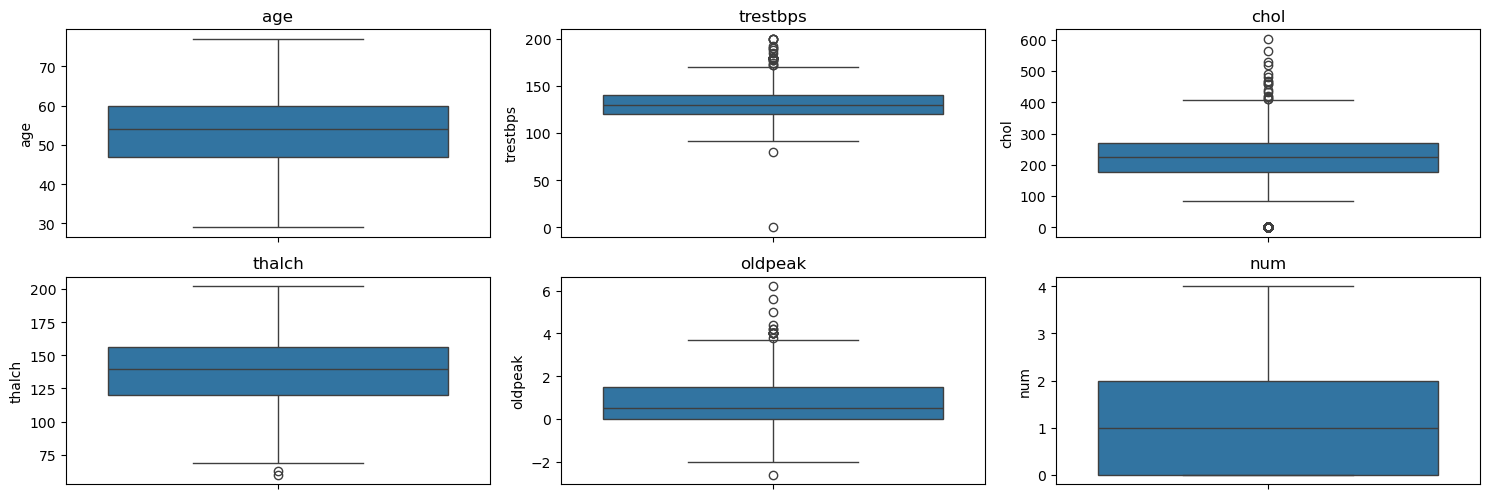

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object
age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64


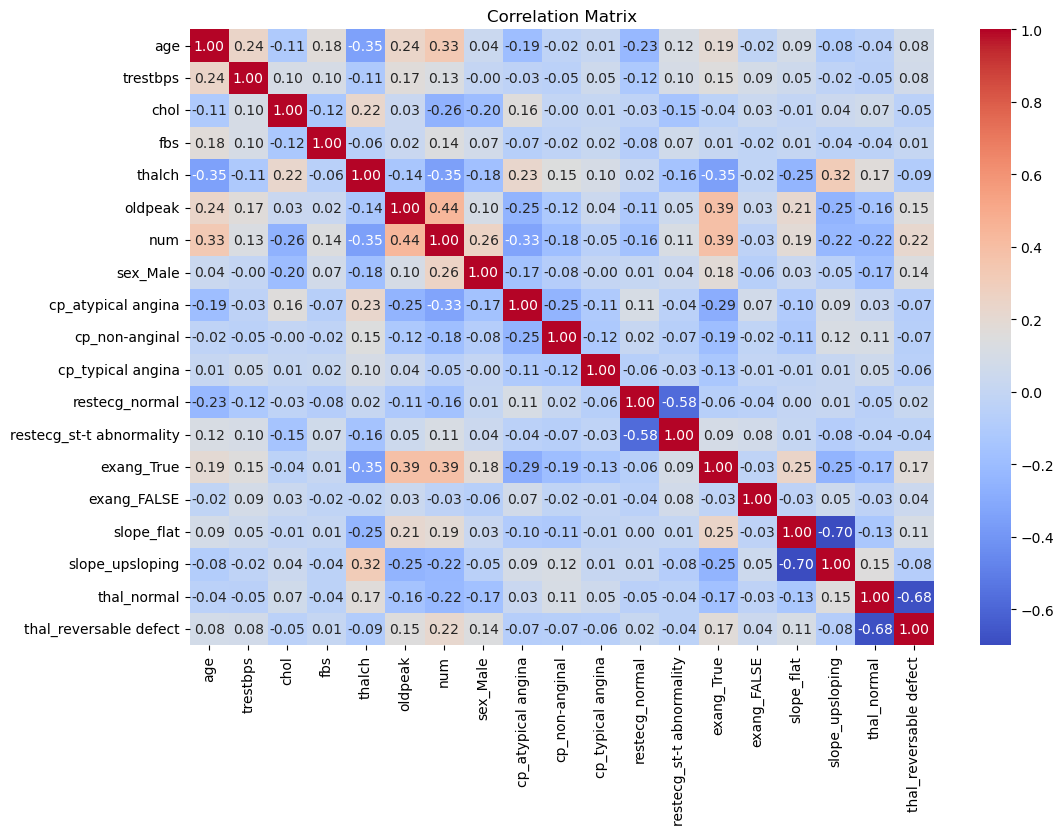

In [25]:
#Visualizations


import matplotlib.pyplot as plt
import seaborn as sns

# Check the structure and info of the dataset
print(ddf.info())

# Visualize the distribution of features
ddf.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(ddf.select_dtypes(include=[np.number]).columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=ddf[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Correlation matrix
print(data.dtypes)

# If there are categorical columns, convert them to numeric
# One-hot encoding for categorical variables
ddf_encoded = pd.get_dummies(ddf, drop_first=True)

# Check for missing values again after encoding
print(ddf_encoded.isnull().sum())

# Calculate the correlation matrix now
plt.figure(figsize=(12, 8))
correlation_matrix = ddf_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [117]:
#Feature Engineering

# Handle categorical variables using Label Encoding or One-Hot Encoding
# Example: Label Encoding
label_encoders = {}
for column in ddf.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    ddf[column] = label_encoders[column].fit_transform(df[column])

# Handle missing values if any (you can also drop or fill missing values)
ddf.fillna(ddf.median(), inplace=True)



In [169]:
# Print the column names
print(ddf.columns)


Index(['trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num', 'sex_Male',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_True',
       'exang_FALSE', 'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect', 'age'],
      dtype='object')


In [225]:
#Decision Tree Classification
# Split the dataset into features (X) and target (y)
X = ddf.drop('chol', axis=1)  # Replace 'target_column' with your actual target column name
y = ddf['num']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Import Decision Tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Initialize the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model using appropriate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

from sklearn.preprocessing import label_binarize

# Binarize the output (for multiclass classification)
y_test_bin = label_binarize(y_test, classes=clf.classes_)

# Get the predicted probabilities for each class
y_prob = clf.predict_proba(X_test)

# Ensure y_test_bin is correctly shaped and matches the shape of y_prob
print(f"y_test_bin shape: {y_test_bin.shape}")
print(f"y_prob shape: {y_prob.shape}")

# Calculate ROC-AUC (multi-class)
# Use the 'ovr' strategy (One-vs-Rest) for multiclass classification
roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='weighted')

print("ROC-AUC (multi-class):", roc_auc)


# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
y_test_bin shape: (170, 5)
y_prob shape: (170, 5)
ROC-AUC (multi-class): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00         5

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [221]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best parameters
best_clf = grid_search.best_estimator_

# Make predictions and evaluate the tuned model
y_pred_best = best_clf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Model Precision:", precision_score(y_test, y_pred_best, average='weighted'))
print("Tuned Model Recall:", recall_score(y_test, y_pred_best, average='weighted'))
print("Tuned Model F1-Score:", f1_score(y_test, y_pred_best, average='weighted'))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Tuned Model Accuracy: 1.0
Tuned Model Precision: 1.0
Tuned Model Recall: 1.0
Tuned Model F1-Score: 1.0


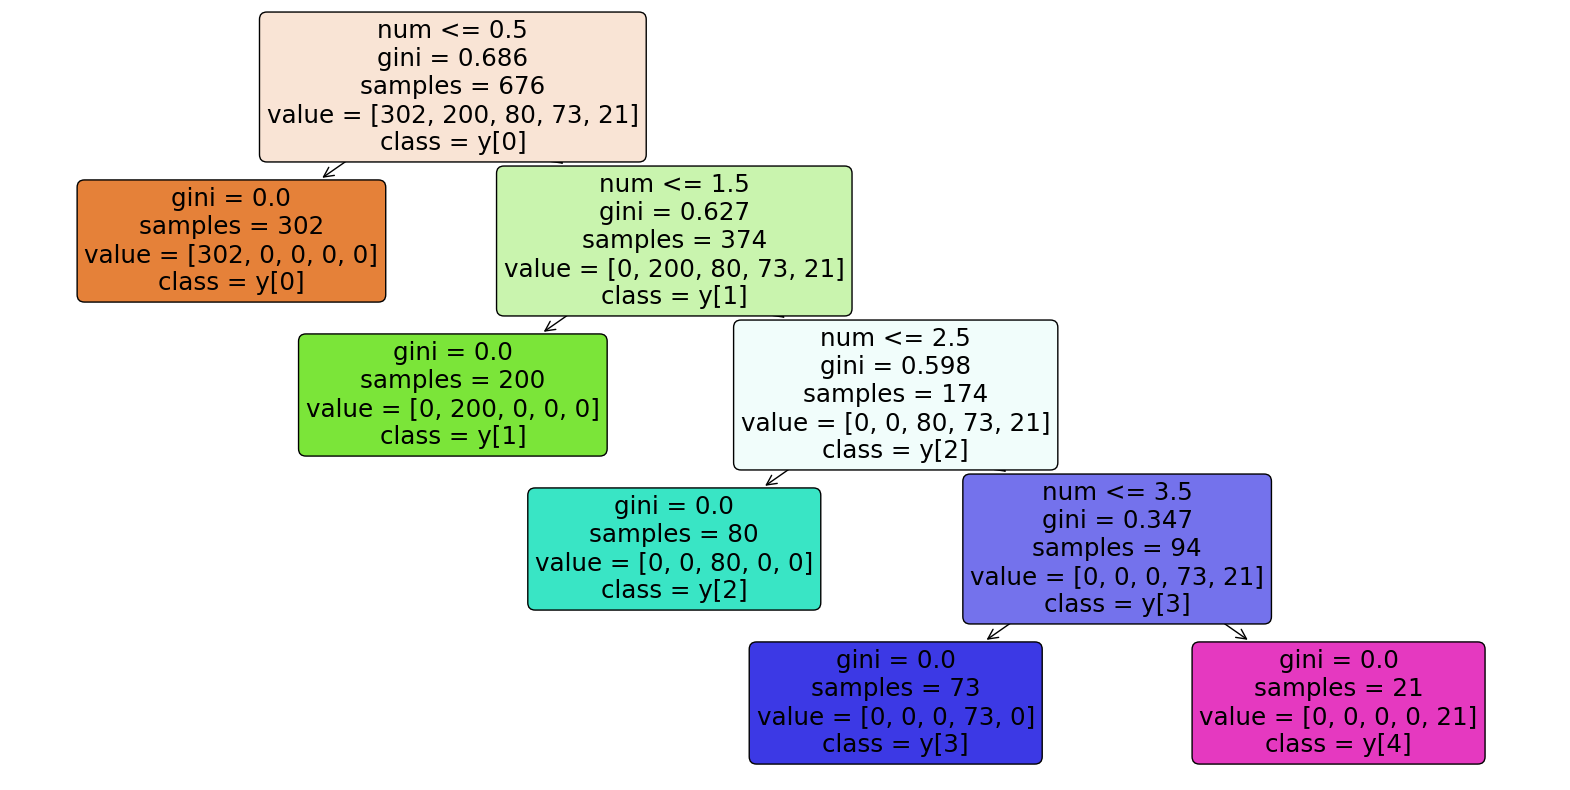

                          Importance
num                              1.0
trestbps                         0.0
restecg_st-t abnormality         0.0
thal_reversable defect           0.0
thal_normal                      0.0
slope_upsloping                  0.0
slope_flat                       0.0
exang_FALSE                      0.0
exang_True                       0.0
restecg_normal                   0.0
fbs                              0.0
cp_typical angina                0.0
cp_non-anginal                   0.0
cp_atypical angina               0.0
sex_Male                         0.0
oldpeak                          0.0
thalch                           0.0
age                              0.0


In [223]:
#Evaluation 

# Visualize the decision tree structure
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

# Check feature importance
feature_importances = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)
